In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install openpyxl

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [28]:
incomes = pd.read_excel("table1.xlsx")

In [5]:
#смотрим на данные: таблица 1 - пополнения на счет
incomes.head()

,operation_id,user_id,volume,currency,operation_date
0,6935122,29282488,25000.0,RUR,2023-02-07 11:17:28
1,5201349,82189896,600000.0,RUR,2023-02-06 14:39:08
2,6935148,9959035,51596.0,USD,2023-02-08 16:07:21
3,1733794,30118944,2.5,USD,2023-02-06 15:22:53
4,3467597,26949080,346.7,RUR,2023-02-09 13:31:38


In [6]:
incomes.shape

(26021, 5)

In [72]:
currencies = pd.read_excel("table2.xlsx") #смотрим на данные: таблица 2 - конвертация валюты
currencies

,rate_currency,rate_countercurrency,rate_value,rate_date
0,CNY,RUB,4217-10-01 00:00:00,2023-02-06
1,EUR,RUB,76.7344,2023-02-06
2,GEL,RUB,26.5863,2023-02-06
3,USD,RUB,70.3847,2023-02-06
4,CNY,RUB,3815-10-01 00:00:00,2023-02-07
5,EUR,RUB,76.0347,2023-02-07
6,GEL,RUB,26.7006,2023-02-07
7,USD,RUB,70.5991,2023-02-07
8,CNY,RUB,4331-10-01 00:00:00,2023-02-08
9,EUR,RUB,75.9087,2023-02-08


In [9]:
currencies.shape

(28, 4)

# 1) Выведите максимальный размер пополнения в долларах за неделю, начинающуюся с 8 февраля
Шаги:
1 - отфильтровать данные с 8 февраля
2 - взять все пополнения в долларах
3 - вывести максимальный размер

In [29]:
# переводим дату и время во временной тип
incomes['operation_date'] = pd.to_datetime(incomes['operation_date'])
incomes['operation_date']

0       2023-02-07 11:17:28
1       2023-02-06 14:39:08
2       2023-02-08 16:07:21
3       2023-02-06 15:22:53
4       2023-02-09 13:31:38
                ...        
26016   2023-02-10 23:23:23
26017   2023-02-07 15:31:19
26018   2023-02-09 15:36:53
26019   2023-02-08 17:24:21
26020   2023-02-06 10:48:22
Name: operation_date, Length: 26021, dtype: datetime64[ns]

In [30]:
incomes = incomes.rename(columns={'operation_date': 'operation_datetime'})
incomes

,operation_id,user_id,volume,currency,operation_datetime
0,6935122,29282488,25000.0,RUR,2023-02-07 11:17:28
1,5201349,82189896,600000.0,RUR,2023-02-06 14:39:08
2,6935148,9959035,51596.0,USD,2023-02-08 16:07:21
3,1733794,30118944,2.5,USD,2023-02-06 15:22:53
4,3467597,26949080,346.7,RUR,2023-02-09 13:31:38
...,...,...,...,...,...
26016,1764422,28342244,2666.7,RUR,2023-02-10 23:23:23
26017,2646644,14987932,6000.0,USD,2023-02-07 15:31:19
26018,3528874,10041206,75.0,RUR,2023-02-09 15:36:53
26019,882225,30761181,200000.0,RUR,2023-02-08 17:24:21


In [31]:
# получим новую колонку "дата" ез времени
incomes['operation_date'] = incomes['operation_datetime'].dt.floor('d')

In [32]:
incomes

,operation_id,user_id,volume,currency,operation_datetime,operation_date
0,6935122,29282488,25000.0,RUR,2023-02-07 11:17:28,2023-02-07
1,5201349,82189896,600000.0,RUR,2023-02-06 14:39:08,2023-02-06
2,6935148,9959035,51596.0,USD,2023-02-08 16:07:21,2023-02-08
3,1733794,30118944,2.5,USD,2023-02-06 15:22:53,2023-02-06
4,3467597,26949080,346.7,RUR,2023-02-09 13:31:38,2023-02-09
...,...,...,...,...,...,...
26016,1764422,28342244,2666.7,RUR,2023-02-10 23:23:23,2023-02-10
26017,2646644,14987932,6000.0,USD,2023-02-07 15:31:19,2023-02-07
26018,3528874,10041206,75.0,RUR,2023-02-09 15:36:53,2023-02-09
26019,882225,30761181,200000.0,RUR,2023-02-08 17:24:21,2023-02-08


In [33]:
#фильтруем
incomes_later_8_feb_usd = incomes[
    (incomes['operation_date'] >= pd.Timestamp('2023-02-08')) & (incomes['currency'] == 'USD')
]

In [26]:
# аксимальный рамер пополнения - ответ на 1 упражнение
incomes_later_8_feb_usd['volume'].max()

1800000.0

# 2) Выведите средний размер пополнений за февраль подневно, в разбивке по валютам
### Результатом должна быть таблица формата "дата, валюта и размер пополнения" (с округлением до целого числа).
Шаги
1- взять все данные за февраль
2- группируем по дате и валюте
3- получаем среднюю сумму пополнений и округляем до целого

<Axes: >

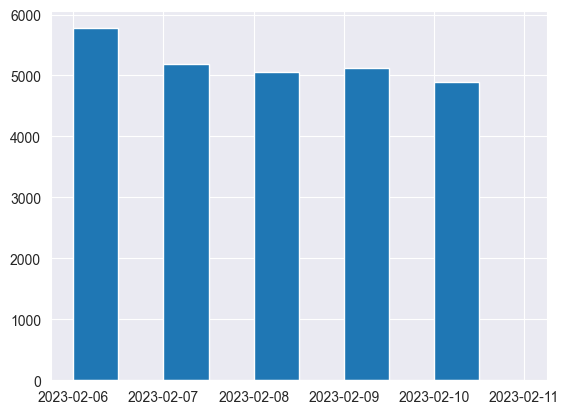

In [34]:
incomes['operation_date'].hist() #все данные из таблицы и так за февраль

In [34]:
#делаем группировку подневно и повалютно, берем среднюю сумму от всех пополнений
#группировочные поля подаем как список
#reset_index -чтобы получить более читаемый формат
mean_volume_per_curency_daily = incomes.groupby(['operation_date', 'currency'])['volume'].mean().reset_index()

In [38]:
#округляем до целого числа
mean_volume_per_curency_daily['volume'] = round(mean_volume_per_curency_daily['volume']).astype(int)

In [65]:
# ответ на 2 упражнение
mean_volume_per_curency_daily

,operation_date,currency,volume
0,2023-02-06,CNY,31461
1,2023-02-06,EUR,8611
2,2023-02-06,RUR,1654025
3,2023-02-06,USD,3750
4,2023-02-07,CNY,24572
5,2023-02-07,EUR,5060
6,2023-02-07,RUR,1567446
7,2023-02-07,USD,5902
8,2023-02-08,CNY,82000
9,2023-02-08,EUR,3909


# 3) Посчитайте долю клиентов, у которых были пополнения в нескольких валютах. Ответ округлите до десятых процента.

1) Получим клиентов с больше чем одной транзакцией пополнения
2) Из этого количества
3) Берем это количество клиентов и делим на всех клиентов

In [43]:
user_transaction_count = incomes.groupby('user_id')['volume'].count().reset_index()

In [44]:
user_transaction_count

,user_id,volume
0,1403,1
1,3311,1
2,3594,1
3,3816,1
4,3893,1
...,...,...
24087,123081660,1
24088,123081824,1
24089,123083740,1
24090,123086476,1


In [45]:
users_transactions_more_than_one = user_transaction_count[user_transaction_count['volume'] > 1]['user_id']

In [46]:
users_transactions_more_than_one

23           13027
66           38439
84           46330
99           50918
184          84281
           ...    
24002    122665840
24016    122749808
24045    122998292
24057    123024856
24081    123068648
Name: user_id, Length: 1639, dtype: int64

In [58]:
#фильтрация на множественный список делается через isin. Взяли уникальную валюту
incomes_users_transactions_more_than_one_unique_cur = incomes[incomes['user_id'].isin(users_transactions_more_than_one)].groupby('user_id')['currency'].nunique().reset_index()
incomes_users_transactions_more_than_one_unique_cur

,user_id,currency
0,13027,1
1,38439,1
2,46330,1
3,50918,1
4,84281,1
...,...,...
1634,122665840,1
1635,122749808,1
1636,122998292,1
1637,123024856,1


In [59]:
#нам надо, чтобы было несколько валют, поэтому больше, чем один
users_transactions_more_than_one_unique_cur_count = incomes_users_transactions_more_than_one_unique_cur[
    incomes_users_transactions_more_than_one_unique_cur['currency'] > 1
].shape[0]
users_transactions_more_than_one_unique_cur_count

73

In [64]:
# осталось поделить на общее количество пользователей = ответ на 3 упражнение
round(users_transactions_more_than_one_unique_cur_count / user_transaction_count.shape[0] * 100, 1)

0.3

# 4) По каждому клиенту вывести дату первого пополнения, валюту, сумму в рублях (используйте вторую таблицу). Ответом выведите общую сумму в рублях по всем клиентам.

In [73]:
incomes

,operation_id,user_id,volume,currency,operation_datetime,operation_date
0,6935122,29282488,25000.0,RUR,2023-02-07 11:17:28,2023-02-07
1,5201349,82189896,600000.0,RUR,2023-02-06 14:39:08,2023-02-06
2,6935148,9959035,51596.0,USD,2023-02-08 16:07:21,2023-02-08
3,1733794,30118944,2.5,USD,2023-02-06 15:22:53,2023-02-06
4,3467597,26949080,346.7,RUR,2023-02-09 13:31:38,2023-02-09
...,...,...,...,...,...,...
26016,1764422,28342244,2666.7,RUR,2023-02-10 23:23:23,2023-02-10
26017,2646644,14987932,6000.0,USD,2023-02-07 15:31:19,2023-02-07
26018,3528874,10041206,75.0,RUR,2023-02-09 15:36:53,2023-02-09
26019,882225,30761181,200000.0,RUR,2023-02-08 17:24:21,2023-02-08


In [74]:
currencies #видим datetime в cny

,rate_currency,rate_countercurrency,rate_value,rate_date
0,CNY,RUB,4217-10-01 00:00:00,2023-02-06
1,EUR,RUB,76.7344,2023-02-06
2,GEL,RUB,26.5863,2023-02-06
3,USD,RUB,70.3847,2023-02-06
4,CNY,RUB,3815-10-01 00:00:00,2023-02-07
5,EUR,RUB,76.0347,2023-02-07
6,GEL,RUB,26.7006,2023-02-07
7,USD,RUB,70.5991,2023-02-07
8,CNY,RUB,4331-10-01 00:00:00,2023-02-08
9,EUR,RUB,75.9087,2023-02-08


In [75]:
currencies['rate_value'][0]  #подтвердили datetime в cny

datetime.datetime(4217, 10, 1, 0, 0)

In [76]:
currencies[currencies['rate_currency'] == 'CNY']

,rate_currency,rate_countercurrency,rate_value,rate_date
0,CNY,RUB,4217-10-01 00:00:00,2023-02-06
4,CNY,RUB,3815-10-01 00:00:00,2023-02-07
8,CNY,RUB,4331-10-01 00:00:00,2023-02-08
12,CNY,RUB,5391-10-01 00:00:00,2023-02-09
16,CNY,RUB,7524-10-01 00:00:00,2023-02-10
20,CNY,RUB,6916-10-01 00:00:00,2023-02-11
24,CNY,RUB,6916-10-01 00:00:00,2023-02-12


In [77]:
#при помощи лямбда - функции для каждого элемента поместили число 10 перед первыми четырьмя символами
currencies.loc[currencies['rate_currency'] == 'CNY', 'rate_value']\
    = currencies.loc[currencies['rate_currency'] == 'CNY', 'rate_value'].astype(str)\
    .apply(lambda x: f'{x[5:7]}.{x[:4]}').astype(float)

In [78]:
incomes

,operation_id,user_id,volume,currency,operation_datetime,operation_date
0,6935122,29282488,25000.0,RUR,2023-02-07 11:17:28,2023-02-07
1,5201349,82189896,600000.0,RUR,2023-02-06 14:39:08,2023-02-06
2,6935148,9959035,51596.0,USD,2023-02-08 16:07:21,2023-02-08
3,1733794,30118944,2.5,USD,2023-02-06 15:22:53,2023-02-06
4,3467597,26949080,346.7,RUR,2023-02-09 13:31:38,2023-02-09
...,...,...,...,...,...,...
26016,1764422,28342244,2666.7,RUR,2023-02-10 23:23:23,2023-02-10
26017,2646644,14987932,6000.0,USD,2023-02-07 15:31:19,2023-02-07
26018,3528874,10041206,75.0,RUR,2023-02-09 15:36:53,2023-02-09
26019,882225,30761181,200000.0,RUR,2023-02-08 17:24:21,2023-02-08


In [93]:
currencies #нормальные курсы валют без битых записей

,rate_currency,rate_countercurrency,rate_value,rate_date
0,CNY,RUB,10.4217,2023-02-06
1,EUR,RUB,76.7344,2023-02-06
2,GEL,RUB,26.5863,2023-02-06
3,USD,RUB,70.3847,2023-02-06
4,CNY,RUB,10.3815,2023-02-07
5,EUR,RUB,76.0347,2023-02-07
6,GEL,RUB,26.7006,2023-02-07
7,USD,RUB,70.5991,2023-02-07
8,CNY,RUB,10.4331,2023-02-08
9,EUR,RUB,75.9087,2023-02-08


In [79]:
#джойним дату на дату, валюту на валюту, left join - т.к есть рублевая валюта, которой не присвоено значения для конвертации
incomes_with_currencies = incomes.merge(
    currencies,
    left_on=['operation_date', 'currency'],
    right_on=['rate_date', 'rate_currency'],
    how='left'
)

In [80]:
incomes_with_currencies

,operation_id,user_id,volume,currency,operation_datetime,operation_date,rate_currency,rate_countercurrency,rate_value,rate_date
0,6935122,29282488,25000.0,RUR,2023-02-07 11:17:28,2023-02-07,NaN,NaN,NaN,NaT
1,5201349,82189896,600000.0,RUR,2023-02-06 14:39:08,2023-02-06,NaN,NaN,NaN,NaT
2,6935148,9959035,51596.0,USD,2023-02-08 16:07:21,2023-02-08,USD,RUB,70.8924,2023-02-08
3,1733794,30118944,2.5,USD,2023-02-06 15:22:53,2023-02-06,USD,RUB,70.3847,2023-02-06
4,3467597,26949080,346.7,RUR,2023-02-09 13:31:38,2023-02-09,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...
26016,1764422,28342244,2666.7,RUR,2023-02-10 23:23:23,2023-02-10,NaN,NaN,NaN,NaT
26017,2646644,14987932,6000.0,USD,2023-02-07 15:31:19,2023-02-07,USD,RUB,70.5991,2023-02-07
26018,3528874,10041206,75.0,RUR,2023-02-09 15:36:53,2023-02-09,NaN,NaN,NaN,NaT
26019,882225,30761181,200000.0,RUR,2023-02-08 17:24:21,2023-02-08,NaN,NaN,NaN,NaT


In [82]:
#заполняем пустые значения значения валют единицами для рублей
incomes_with_currencies['rate_value'] = incomes_with_currencies['rate_value'].fillna(1.0)

In [83]:
incomes_with_currencies['rate_value'] = incomes_with_currencies['rate_value'].astype(float)

In [84]:
incomes_with_currencies['volume'] = incomes_with_currencies['volume'].astype(float)

In [85]:
# конвертируем
incomes_with_currencies['volume_rub'] = incomes_with_currencies['rate_value'] * incomes_with_currencies['volume']

In [86]:
incomes_with_currencies

,operation_id,user_id,volume,currency,operation_datetime,operation_date,rate_currency,rate_countercurrency,rate_value,rate_date,volume_rub
0,6935122,29282488,25000.0,RUR,2023-02-07 11:17:28,2023-02-07,NaN,NaN,1.0000,NaT,2.500000e+04
1,5201349,82189896,600000.0,RUR,2023-02-06 14:39:08,2023-02-06,NaN,NaN,1.0000,NaT,6.000000e+05
2,6935148,9959035,51596.0,USD,2023-02-08 16:07:21,2023-02-08,USD,RUB,70.8924,2023-02-08,3.657764e+06
3,1733794,30118944,2.5,USD,2023-02-06 15:22:53,2023-02-06,USD,RUB,70.3847,2023-02-06,1.759617e+02
4,3467597,26949080,346.7,RUR,2023-02-09 13:31:38,2023-02-09,NaN,NaN,1.0000,NaT,3.467000e+02
...,...,...,...,...,...,...,...,...,...,...,...
26016,1764422,28342244,2666.7,RUR,2023-02-10 23:23:23,2023-02-10,NaN,NaN,1.0000,NaT,2.666700e+03
26017,2646644,14987932,6000.0,USD,2023-02-07 15:31:19,2023-02-07,USD,RUB,70.5991,2023-02-07,4.235946e+05
26018,3528874,10041206,75.0,RUR,2023-02-09 15:36:53,2023-02-09,NaN,NaN,1.0000,NaT,7.500000e+01
26019,882225,30761181,200000.0,RUR,2023-02-08 17:24:21,2023-02-08,NaN,NaN,1.0000,NaT,2.000000e+05


In [87]:
# ищем первое пополнение
users_first_incomes = incomes_with_currencies.groupby('user_id')['operation_datetime'].min().reset_index()

In [113]:
# inner - берем только тех, у кого первое пополнение
incomes_with_currencies_users_first_incomes = incomes_with_currencies.merge(
    users_first_incomes,
    on=['user_id', 'operation_datetime'],
    how='inner')

In [116]:
# ответ на 4 вопрос
incomes_with_currencies_users_first_incomes['volume_rub'].sum()

26114821150.3513

# 5) Посчитайте по каждому клиенту среднюю разницу в днях между его пополнениями, выведите медианное значение по всем клиентам.
Шаги
1- Не интересуют те, кто транзачили только один раз
2- Отсортировать датафрейм по пользователям Asc
3- Будем смотреть актуальные лаги по времени

In [88]:
incomes_users_transactions_more_than_one = incomes[incomes['user_id'].isin(users_transactions_more_than_one)].copy(deep=True)

In [91]:
incomes_users_transactions_more_than_one_sorted = incomes_users_transactions_more_than_one.sort_values(['user_id', 'operation_datetime'])
incomes_users_transactions_more_than_one_sorted

,operation_id,user_id,volume,currency,operation_datetime,operation_date
25633,3522176,13027,1724.6,USD,2023-02-08 11:09:39,2023-02-08
5961,3472673,13027,1161.8,USD,2023-02-10 11:11:25,2023-02-10
2193,1158517,38439,1401488.0,RUR,2023-02-08 22:23:32,2023-02-08
3343,3475880,38439,5000.0,RUR,2023-02-10 14:18:28,2023-02-10
24337,1760638,46330,105000.0,RUR,2023-02-08 11:11:26,2023-02-08
...,...,...,...,...,...,...
19521,3508539,122998292,40000.0,RUR,2023-02-06 17:02:33,2023-02-06
20803,877660,123024856,225000.0,RUR,2023-02-06 15:01:14,2023-02-06
25335,4693705,123024856,278000.0,RUR,2023-02-07 19:26:09,2023-02-07
17600,7030872,123068648,3333.3,RUR,2023-02-07 11:22:25,2023-02-07


In [93]:
#оконная функция = 1. отсортировали по времени, 2. берем предыдущее значение по времени
incomes_users_transactions_more_than_one_sorted['operation_datetime_lag'] = incomes_users_transactions_more_than_one_sorted.groupby('user_id')['operation_datetime'].shift(1)
incomes_users_transactions_more_than_one_sorted

,operation_id,user_id,volume,currency,operation_datetime,operation_date,operation_datetime_lag
25633,3522176,13027,1724.6,USD,2023-02-08 11:09:39,2023-02-08,NaT
5961,3472673,13027,1161.8,USD,2023-02-10 11:11:25,2023-02-10,2023-02-08 11:09:39
2193,1158517,38439,1401488.0,RUR,2023-02-08 22:23:32,2023-02-08,NaT
3343,3475880,38439,5000.0,RUR,2023-02-10 14:18:28,2023-02-10,2023-02-08 22:23:32
24337,1760638,46330,105000.0,RUR,2023-02-08 11:11:26,2023-02-08,NaT
...,...,...,...,...,...,...,...
19521,3508539,122998292,40000.0,RUR,2023-02-06 17:02:33,2023-02-06,2023-02-06 16:08:15
20803,877660,123024856,225000.0,RUR,2023-02-06 15:01:14,2023-02-06,NaT
25335,4693705,123024856,278000.0,RUR,2023-02-07 19:26:09,2023-02-07,2023-02-06 15:01:14
17600,7030872,123068648,3333.3,RUR,2023-02-07 11:22:25,2023-02-07,NaT


In [94]:
# выкинем NaT, подготавливаем маску
incomes_users_transactions_more_than_one_sorted['operation_datetime_lag'].isna()

25633     True
5961     False
2193      True
3343     False
24337     True
         ...  
19521    False
20803     True
25335    False
17600     True
21756    False
Name: operation_datetime_lag, Length: 3568, dtype: bool

In [98]:
# Тильда ~ знак инверсии
incomes_users_transactions_more_than_one_sorted_only_lags = incomes_users_transactions_more_than_one_sorted[
    ~incomes_users_transactions_more_than_one_sorted['operation_datetime_lag'].isna()]
incomes_users_transactions_more_than_one_sorted_only_lags

,operation_id,user_id,volume,currency,operation_datetime,operation_date,operation_datetime_lag
5961,3472673,13027,1161.8,USD,2023-02-10 11:11:25,2023-02-10,2023-02-08 11:09:39
3343,3475880,38439,5000.0,RUR,2023-02-10 14:18:28,2023-02-10,2023-02-08 22:23:32
14824,6992512,46330,20000.0,RUR,2023-02-10 14:28:15,2023-02-10,2023-02-08 11:11:26
15865,876508,50918,15000.0,RUR,2023-02-09 09:03:23,2023-02-09,2023-02-06 08:41:36
5634,5212268,84281,150000.0,RUR,2023-02-06 17:47:31,2023-02-06,2023-02-06 13:08:22
...,...,...,...,...,...,...,...
7066,3487541,122665840,255000.0,RUR,2023-02-10 11:42:24,2023-02-10,2023-02-06 14:11:44
25639,7045286,122749808,3134333.3,RUR,2023-02-10 13:36:06,2023-02-10,2023-02-07 18:00:29
19521,3508539,122998292,40000.0,RUR,2023-02-06 17:02:33,2023-02-06,2023-02-06 16:08:15
25335,4693705,123024856,278000.0,RUR,2023-02-07 19:26:09,2023-02-07,2023-02-06 15:01:14


In [ ]:
# \ знак экранирования
# дельта по времени
incomes_users_transactions_more_than_one_sorted_only_lags['operation_datetime_delta'] \
    = incomes_users_transactions_more_than_one_sorted_only_lags['operation_datetime'] \
    - incomes_users_transactions_more_than_one_sorted_only_lags['operation_datetime_lag']

In [101]:
user_operation_datetime_delta = incomes_users_transactions_more_than_one_sorted_only_lags.groupby('user_id')['operation_datetime_delta'].mean().reset_index()
user_operation_datetime_delta
#собрано среднее время между пополнениями

,user_id,operation_datetime_delta
0,13027,2 days 00:01:46
1,38439,1 days 15:54:56
2,46330,2 days 03:16:49
3,50918,3 days 00:21:47
4,84281,0 days 04:39:09
...,...,...
1634,122665840,3 days 21:30:40
1635,122749808,2 days 19:35:37
1636,122998292,0 days 00:54:18
1637,123024856,1 days 04:24:55


In [102]:
# получаем дни и берем медианное время = ответ на 5 вопрос
np.median(user_operation_datetime_delta['operation_datetime_delta'].dt.days)

1.0